In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset

data = pd.read_csv('Occupancy_Estimation.csv')

# Data Preprocessing

In [3]:
# Checking number of rows and column

data.shape

(10129, 19)

In [4]:
# Checking null values

null_values = data.isnull().sum()
null_values.head(10)

Date        0
Time        0
S1_Temp     0
S2_Temp     0
S3_Temp     0
S4_Temp     0
S1_Light    0
S2_Light    0
S3_Light    0
S4_Light    0
dtype: int64

In [5]:
#checking for duplicate values

data.duplicated().sum()

0

In [6]:
#checking data types

data.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [7]:
# Converting 'date' to datetime format

data['date'] = pd.to_datetime(data['Date'])


In [8]:
data.dtypes

Date                            object
Time                            object
S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
date                    datetime64[ns]
dtype: object

In [9]:
# Descriptive statistics

stats_summary = data.describe(include='all', datetime_is_numeric=True)
stats_summary.head(10)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,date
count,10129,10129,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129
unique,7,10129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017/12/23,10:49:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2779,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.10384,460.860401,-0.004830,0.090137,0.079574,0.398559,2017-12-27 08:26:49.319774720
min,NaN,NaN,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.05000,345.000000,-6.296154,0.000000,0.000000,0.000000,2017-12-22 00:00:00
25%,NaN,NaN,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.06000,355.000000,-0.046154,0.000000,0.000000,0.000000,2017-12-23 00:00:00
50%,NaN,NaN,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.08000,360.000000,0.000000,0.000000,0.000000,0.000000,2017-12-24 00:00:00
75%,NaN,NaN,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.10000,465.000000,0.000000,0.000000,0.000000,0.000000,2017-12-26 00:00:00
max,NaN,NaN,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.40000,1270.000000,8.980769,1.000000,1.000000,3.000000,2018-01-11 00:00:00


In [10]:
# Value counts for 'Room_Occupancy_Count'

occupancy_counts = data['Room_Occupancy_Count'].value_counts()
occupancy_counts.head()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

In [11]:
# Creating a new column 'Total_Temperature' by adding the four temperature columns

data['Total_Temperature'] = data['S1_Temp'] + data['S2_Temp'] + data['S3_Temp'] + data['S4_Temp']

# Creating a new column 'Total_Light' by adding the four light columns

data['Total_Light'] = data['S1_Light'] + data['S2_Light'] + data['S3_Light'] + data['S4_Light']

# Creating a new column 'Total_Sound' by adding the four sound columns

data['Total_Sound'] = data['S1_Sound'] + data['S2_Sound'] + data['S3_Sound'] + data['S4_Sound']

# Creating a new column 'Total_CO2' by adding the two CO2 columns

data['Total_CO2'] = data['S5_CO2'] + data['S5_CO2_Slope']

# Creating a new column 'Total_PIR' by adding the two PIR columns

data['Total_PIR'] = data['S6_PIR'] + data['S7_PIR'] 

data.head(10)


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,date,Total_Temperature,Total_Light,Total_Sound,Total_CO2,Total_PIR
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.769231,0,0,1,2017-12-22,99.63,248,0.39,390.769231,0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.646154,0,0,1,2017-12-22,99.69,247,1.10,390.646154,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.519231,0,0,1,2017-12-22,99.69,248,0.68,390.519231,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.388462,0,0,1,2017-12-22,99.75,248,0.70,390.388462,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.253846,0,0,1,2017-12-22,99.75,249,0.36,390.253846,0
5,2017/12/22,10:52:14,25.00,24.81,24.56,25.44,121,34,54,40,...,0.165385,0,0,1,2017-12-22,99.81,249,0.32,390.165385,0
6,2017/12/22,10:52:45,25.00,24.75,24.56,25.44,120,34,54,40,...,0.076923,1,0,1,2017-12-22,99.75,248,2.20,390.076923,1
7,2017/12/22,10:53:15,25.00,24.81,24.56,25.44,121,34,54,41,...,-0.011538,0,0,1,2017-12-22,99.81,250,0.29,389.988462,0
8,2017/12/22,10:53:46,25.00,24.81,24.56,25.50,122,35,56,43,...,-0.100000,0,0,1,2017-12-22,99.87,256,0.33,389.900000,0
9,2017/12/22,10:54:17,25.00,24.81,24.56,25.50,101,34,57,43,...,-0.188462,1,1,1,2017-12-22,99.87,235,5.35,389.811538,2


# Exploratory Data Analysis

In the exploratory data analysis, we will examine the data distribution as well as the data time series. The correlation between the variables will also be analyzed.

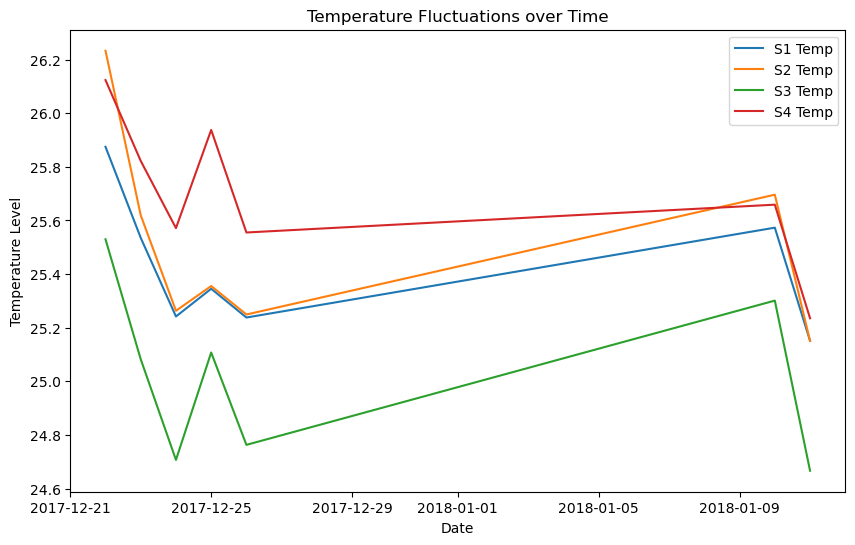

In [12]:
# Visualizing temperature fluctuations over time

plt.figure(figsize=(10, 6))

# Plotting temperature from S1
temp_grouped_s1 = data.groupby('date')['S1_Temp'].mean().reset_index()
sns.lineplot(x='date', y='S1_Temp', data=temp_grouped_s1, label='S1 Temp')

# Plotting temperature from S2
temp_grouped_s2 = data.groupby('date')['S2_Temp'].mean().reset_index()
sns.lineplot(x='date', y='S2_Temp', data=temp_grouped_s2, label='S2 Temp')

# Plotting temperature from S3
temp_grouped_s3 = data.groupby('date')['S3_Temp'].mean().reset_index()
sns.lineplot(x='date', y='S3_Temp', data=temp_grouped_s3, label='S3 Temp')

# Plotting temperature from S3
temp_grouped_s4 = data.groupby('date')['S4_Temp'].mean().reset_index()
sns.lineplot(x='date', y='S4_Temp', data=temp_grouped_s4, label='S4 Temp')

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('Temperature Level')
plt.title('Temperature Fluctuations over Time')
plt.legend()

S1 Temp (in blue) shows a decrease initially, then a steady increase before a sharp drop at the end.
S2 Temp (in orange) remains relatively stable with a slight upward trend until it also drops sharply at the end.
S3 Temp (in red) shows more variability with sharp increases and decreases, and like the others, ends with a sharp drop.
S4 Temp (in green) indicates a gradual increase over time, with no sharp drop like the others at the end of the observed period.
The heat that humans emit from their bodies may cause the temperature of the room to rise.

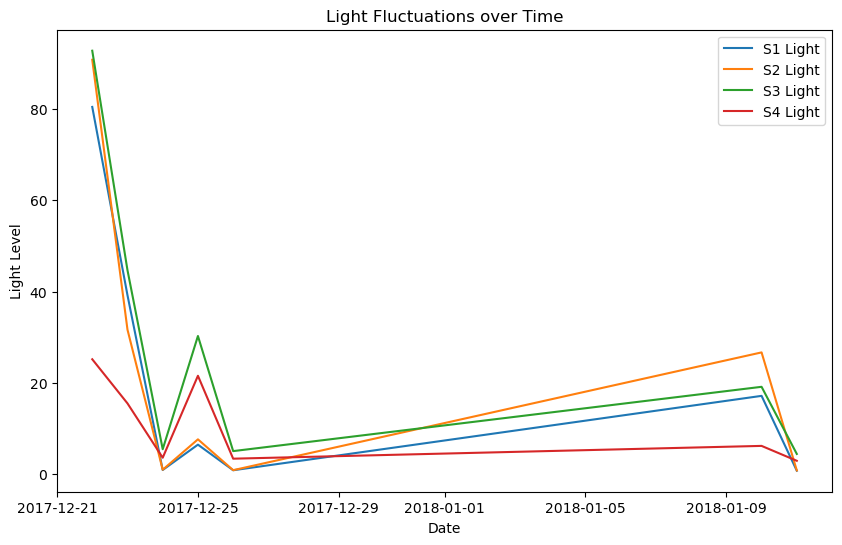

In [13]:
# Visualizing light fluctuations over time

plt.figure(figsize=(10, 6))

# Plotting light from S1
temp_grouped_s1 = data.groupby('date')['S1_Light'].mean().reset_index()
sns.lineplot(x='date', y='S1_Light', data=temp_grouped_s1, label='S1 Light')

# Plotting light from S2
temp_grouped_s2 = data.groupby('date')['S2_Light'].mean().reset_index()
sns.lineplot(x='date', y='S2_Light', data=temp_grouped_s2, label='S2 Light')

# Plotting light from S3
temp_grouped_s3 = data.groupby('date')['S3_Light'].mean().reset_index()
sns.lineplot(x='date', y='S3_Light', data=temp_grouped_s3, label='S3 Light')

# Plotting light from S3
temp_grouped_s4 = data.groupby('date')['S4_Light'].mean().reset_index()
sns.lineplot(x='date', y='S4_Light', data=temp_grouped_s4, label='S4 Light')

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('Light Level')
plt.title('Light Fluctuations over Time')
plt.legend()

The light level in all sensors shows a notable decrease soon after the observed period begins, followed by an increase and stabilization. Light level spikes appear to be synchronized across all sensors, indicating that environmental changes or events have a similar effect on all sensors. As the observed period draws to an end, all sensor light levels abruptly drop to zero, which may be a sign that the sensors have stopped collecting data or that the lights have been turned off. This means that since the light was turned off there might be no people in the room which shows the occupancy of the room.

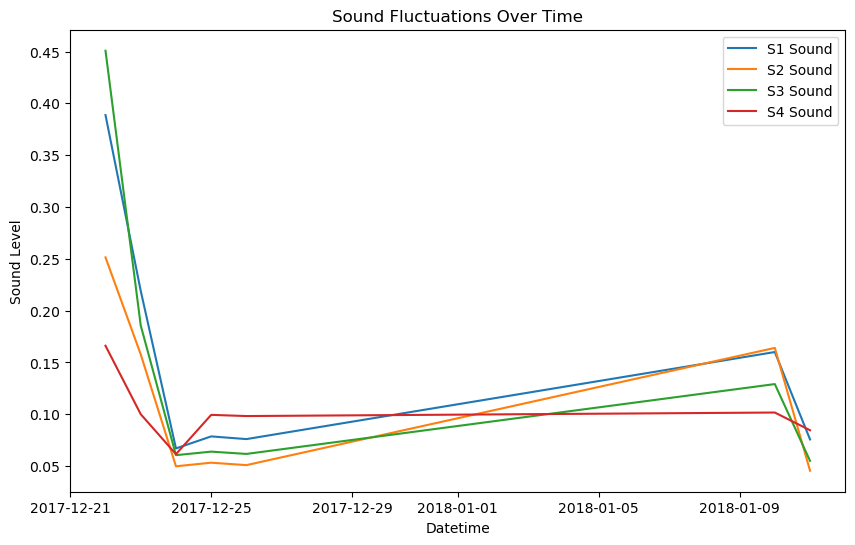

In [14]:
# Visualizing sound fluctuations over time

plt.figure(figsize=(10, 6))

# Plotting sound from S1
sound_grouped_s1 = data.groupby('date')['S1_Sound'].mean().reset_index()
sns.lineplot(x='date', y='S1_Sound', data=sound_grouped_s1, label='S1 Sound')

# Plotting sound from S2
sound_grouped_s2 = data.groupby('date')['S2_Sound'].mean().reset_index()
sns.lineplot(x='date', y='S2_Sound', data=sound_grouped_s2, label='S2 Sound')

# Plotting sound from S3
sound_grouped_s3 = data.groupby('date')['S3_Sound'].mean().reset_index()
sns.lineplot(x='date', y='S3_Sound', data=sound_grouped_s3, label='S3 Sound')

# Plotting sound from S4
sound_grouped_s4 = data.groupby('date')['S4_Sound'].mean().reset_index()
sns.lineplot(x='date', y='S4_Sound', data=sound_grouped_s4, label='S4 Sound')

# Setting labels and title
plt.legend()
plt.title('Sound Fluctuations Over Time')
plt.xlabel('Datetime')
plt.ylabel('Sound Level')
plt.show()


At the start of the timeframe, all sensors show a sharp decline in sound level, which then levels out to relatively constant lower values.The sound levels vary and fluctuate a little bit, but they stay mostly low during the entire duration.Like the light sensors, all the sound sensors show a drop to the lowest level at the end of the period, indicating that either the sensors are turned off or there was a period of silence. Low sound might mean no presence of people in the room which also gives us the occupancy of the room.


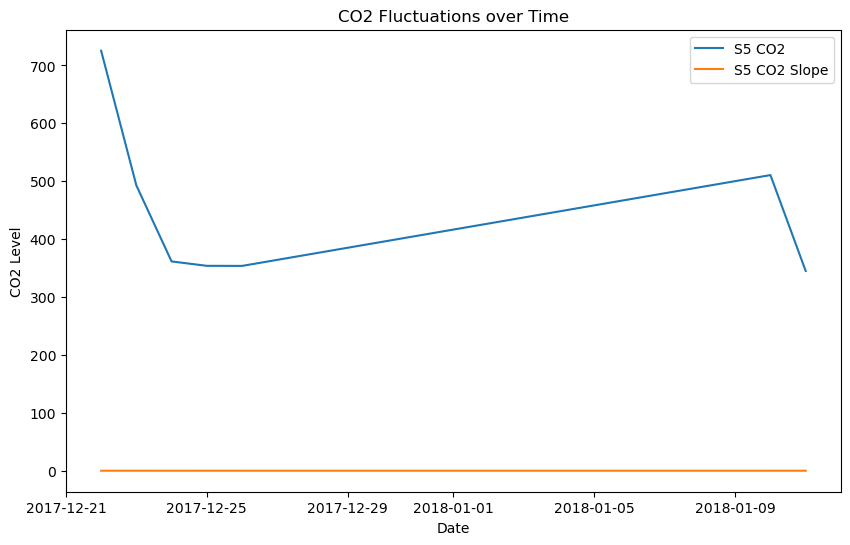

In [15]:
# Visualizing CO2 fluctuations over time

plt.figure(figsize=(10, 6))

# Plotting co2 from S5
temp_grouped_s5 = data.groupby('date')['S5_CO2'].mean().reset_index()
sns.lineplot(x='date', y='S5_CO2', data=temp_grouped_s5, label='S5 CO2')

# Plotting co2 from S5 slope
temp_grouped_s5_slope = data.groupby('date')['S5_CO2_Slope'].mean().reset_index()
sns.lineplot(x='date', y='S5_CO2_Slope', data=temp_grouped_s5_slope, label='S5 CO2 Slope')

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.title('CO2 Fluctuations over Time')
plt.legend()

The concentration of CO2 peaks, declines sharply at first, stabilizes, and then gradually increases over time.
As the observed period comes to an end, there is a noticeable reduction in CO2 levels. It is possible that steady-state conditions or a lack of significant occurrences causing rapid changes in CO2 levels are to blame for the 'S5 CO2 Slope' line's constant location at the bottom of the graph, close to zero, indicating little to no slope or change in CO2 levels over time. A sudden drop in CO2 concentration at the end of the period suggests that something, like opening windows to let in fresh air or clearing out an occupied space, may have contributed to the quick drop in CO2 levels.

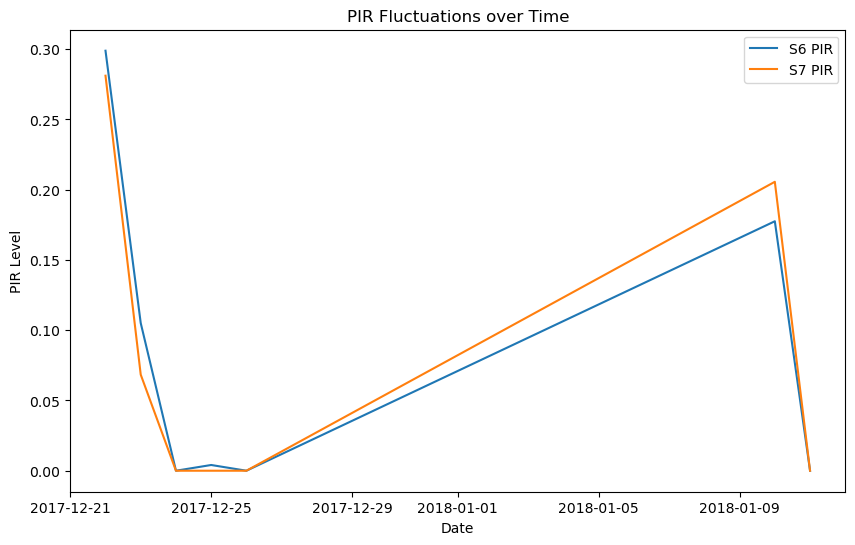

In [16]:
# Visualizing Passive Infrared Sensor (PIR) fluctuations over time

plt.figure(figsize=(10, 6))

# Plotting pir from S6
temp_grouped_s6 = data.groupby('date')['S6_PIR'].mean().reset_index()
sns.lineplot(x='date', y='S6_PIR', data=temp_grouped_s6, label='S6 PIR')

# Plotting pir from S7
temp_grouped_s7 = data.groupby('date')['S7_PIR'].mean().reset_index()
sns.lineplot(x='date', y='S7_PIR', data=temp_grouped_s7, label='S7 PIR')

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('PIR Level')
plt.title('PIR Fluctuations over Time')
plt.legend()

At the beginning of the period, both sensors, S6 and S7, exhibit a sharp decline in activity levels, which may indicate a decrease in occupancy or motion detected. Both sensors show a consistent rise in PIR levels after the initial decline, which may be indicative of a slow rise in occupancy or activity over time. At the conclusion of the period, both sensors show a sharp decline in PIR levels, suggesting an abrupt decrease in motion or occupancy detected, potentially as a result of the space being vacated or used less frequently. The PIR levels of S6 and S7 track closely together over the course of the period, which may indicate that they are monitoring the same area or similar environmental conditions and suggests similar detection patterns.

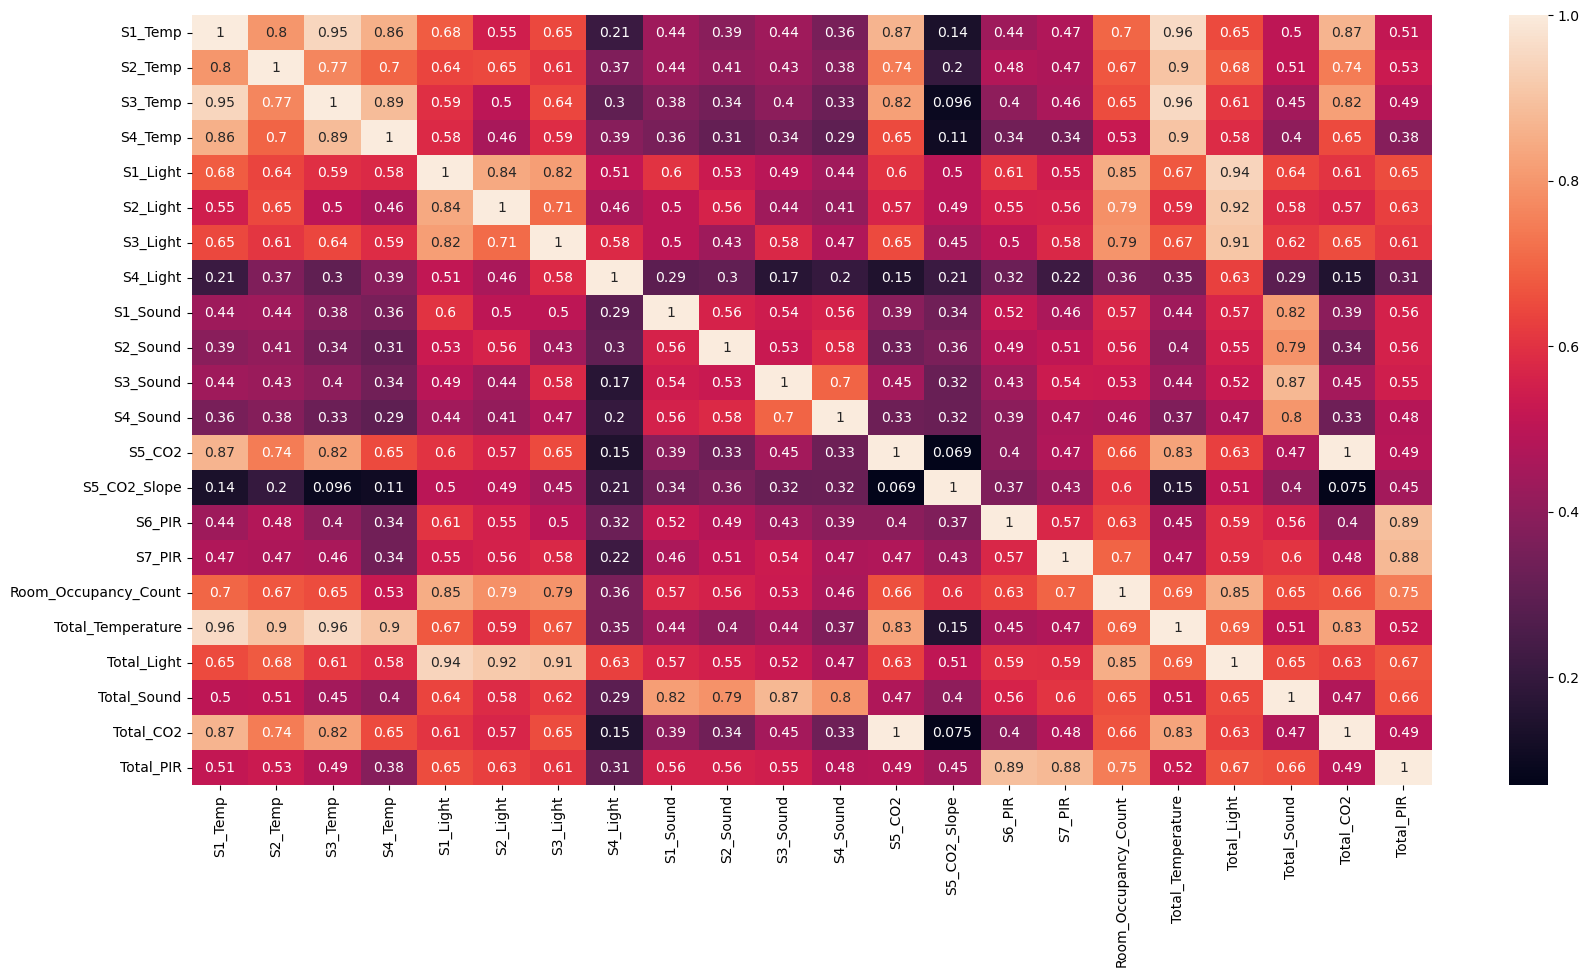

In [17]:
# Correlation heatmap between variables
 
correlation_matrix = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Dark red cells show a high positive correlation, which means that as one variable increases, so does the other.
Dark purple cells suggest a strong negative correlation, which means that as one variable rises, the other falls. Cells that are lighter in color (closer to white) have a lower correlation. Diagonal cells are dark red because they signify each variable's correlation with itself, which is always 1.

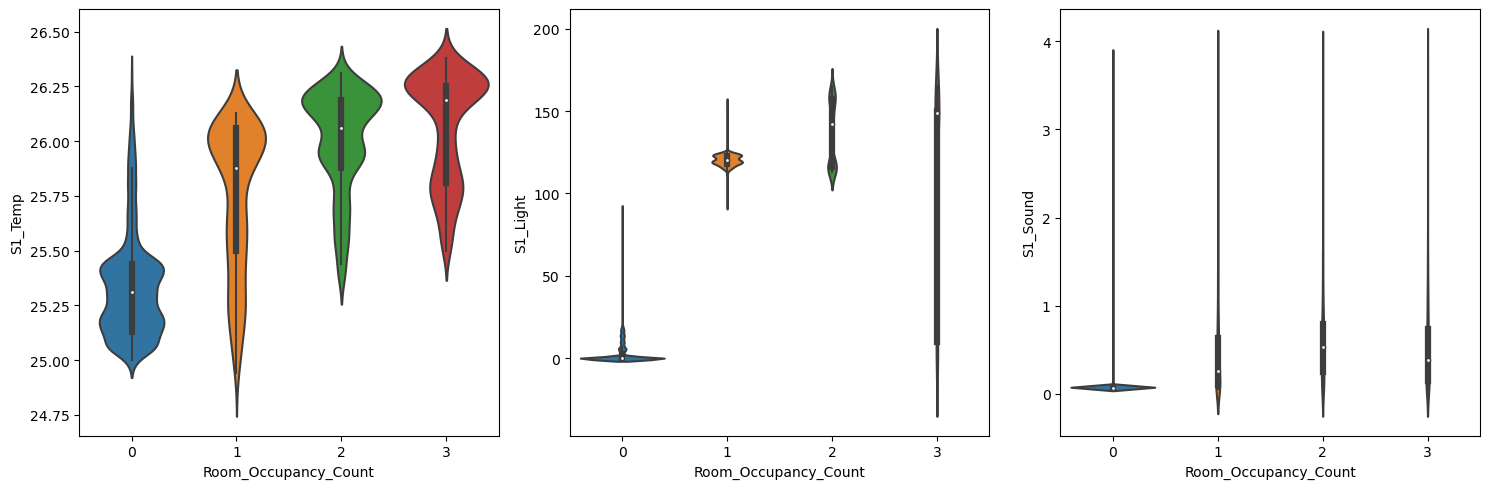

In [18]:
# Violinplot for Temperature, Light and Sound with respect to Room_Occupancy_Count

plt.figure(figsize=(15, 5))
for idx, feature in enumerate(['S1_Temp', 'S1_Light', 'S1_Sound']):
    plt.subplot(1, 3, idx+1)
    sns.violinplot(y=data[feature], x=data['Room_Occupancy_Count'])
    plt.xlabel('Room_Occupancy_Count')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

The first plot demonstrates how the temperature tends to rise slightly as room occupancy rises. The violins' wider sections at higher occupancy levels serve as an indicator of this.
The second plot displays the light levels in relation to room occupancy. When the occupancy is 1, there is a notable spread in light levels, with a longer tail suggesting some higher light readings.
The third plot for sound highlights that, for all occupancy levels, sound levels are typically low, with a few uncommon (and potentially outlier) instances of higher sound levels when occupancy is 0.

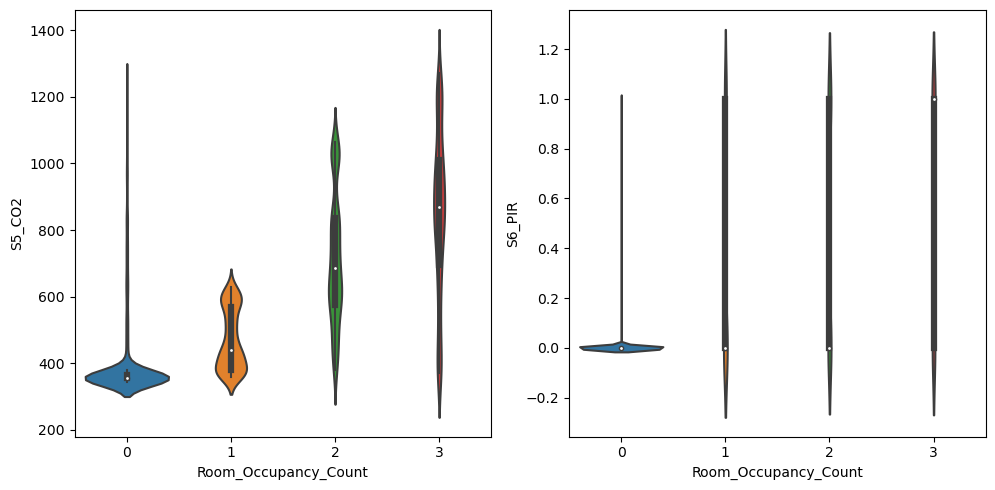

In [19]:
# Similarly, Violinplot for CO2 and PIR with respect to Room_Occupancy_Count

plt.figure(figsize=(15, 5))
for idx, feature in enumerate(['S5_CO2', 'S6_PIR']):
    plt.subplot(1, 3, idx+1)
    sns.violinplot(y=data[feature], x=data['Room_Occupancy_Count'])
    plt.xlabel('Room_Occupancy_Count')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

The plot for 'S5_CO2' reveals a wide range of CO2 levels when the occupancy count is 1, suggesting fluctuation in CO2 concentration at this occupancy level. CO2 levels are generally higher for occupancy counts of 2 and 3, implying that CO2 concentration increases with more occupants. CO2 levels are lowest when the occupancy count is zero, with a narrow distribution indicating consistent low CO2 readings in the absence of occupants.
The 'S6_PIR' plot exhibits a very narrow distribution and low activity for all occupancy counts. The median PIR level increases slightly from 0 to 1, but the overall low spread suggests minimal detected motion, which could indicate that the sensor is not highly sensitive to movement or that there is little movement in the room regardless of occupancy count.

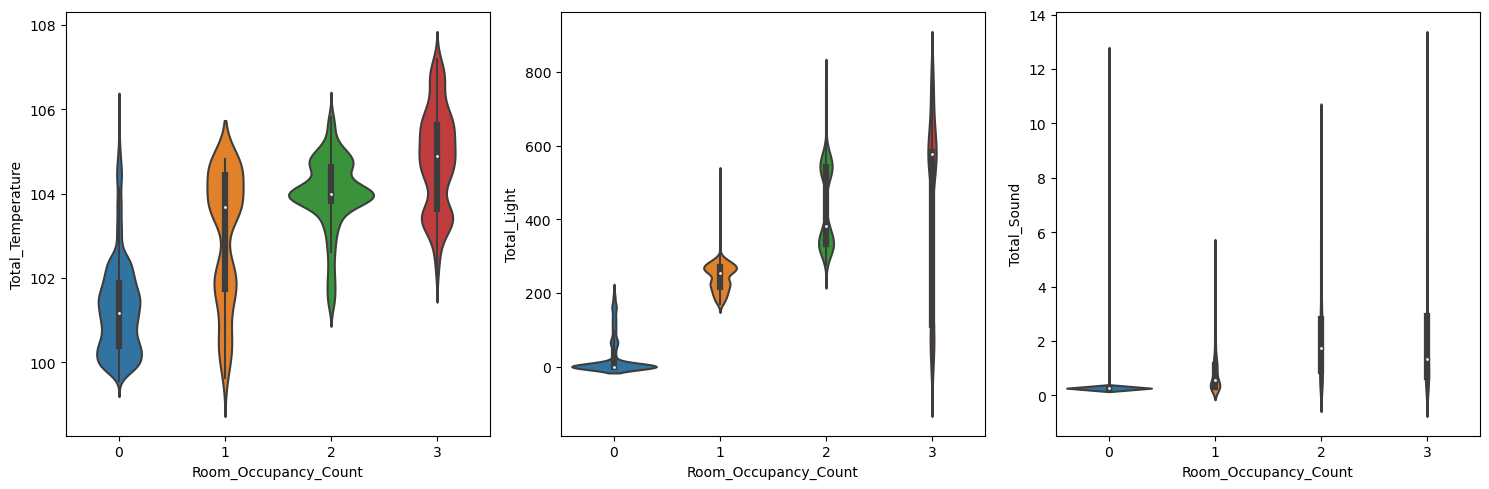

In [20]:
# Violinplot for Total_Temperature, Total_Light and Total_Sound with respect to Room_Occupancy_Count

plt.figure(figsize=(15, 5))
for idx, feature in enumerate(['Total_Temperature', 'Total_Light', 'Total_Sound']):
    plt.subplot(1, 3, idx+1)
    sns.violinplot(y=data[feature], x=data['Room_Occupancy_Count'])
    plt.xlabel('Room_Occupancy_Count')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

The 'Total Temperature' appears to rise in tandem with an increase in occupancy, indicating a possible relationship between body heat and temperature.
At an occupancy count of one, 'Total Light' shows significant variability, with a long tail implying occasional high light readings.
'Total Sound' levels exhibit a slight increase from occupancy count 0 to 1, but are generally low across all occupancy counts.

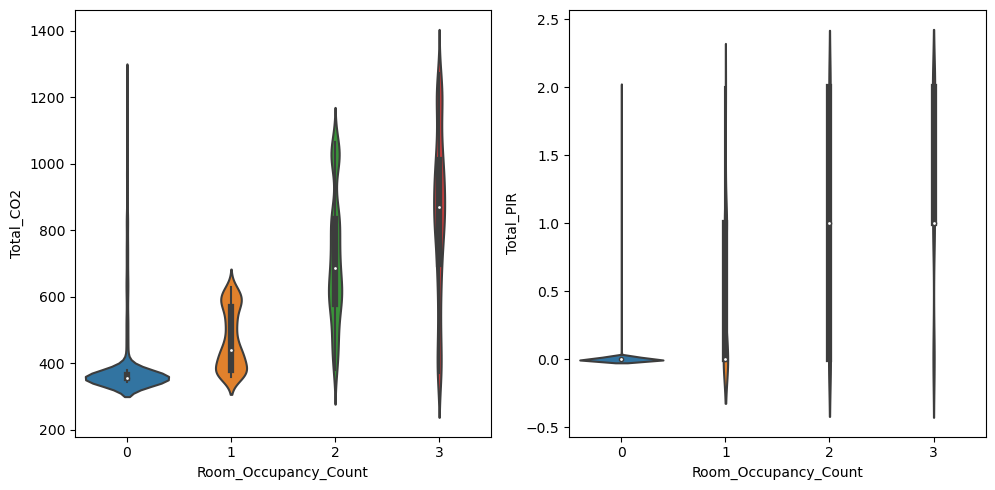

In [21]:
# Similarly, Violinplot for Total_CO2 and Total_PIR with respect to Room_Occupancy_Count

plt.figure(figsize=(15, 5))
for idx, feature in enumerate(['Total_CO2', 'Total_PIR']):
    plt.subplot(1, 3, idx+1)
    sns.violinplot(y=data[feature], x=data['Room_Occupancy_Count'])
    plt.xlabel('Room_Occupancy_Count')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

When there is only one person in the room, the 'Total_CO2' levels fluctuate greatly, indicating a range of CO2 values. There appears to be a relationship between the number of occupants and CO2 levels, most likely because of respiration, at higher occupancy counts (2 and 3). As would be expected, the lowest CO2 readings happen when there are no occupants (occupancy count of 0).
When occupancy rises, there is little to no change in the 'Total_PIR' levels, which stay low across all occupancy counts. 
This may mean that there's not much movement being detected by the PIR sensors (which normally detect motion) or that occupancy isn't having a big impact on the values.

# Data Preprocessing 2

In [22]:
# Creating a copy of the original dataset and dropping specific columns from the dataset
new_data = data.copy().drop(['Total_Temperature', 'Total_Light', 'Total_Sound', 'Total_CO2', 'Total_PIR', 'Date', 'Time', 'date'], axis=1)
new_data.head(10)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,25.00,24.81,24.56,25.44,121,34,54,40,0.13,0.06,0.06,0.07,390,0.165385,0,0,1
6,25.00,24.75,24.56,25.44,120,34,54,40,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
7,25.00,24.81,24.56,25.44,121,34,54,41,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
8,25.00,24.81,24.56,25.50,122,35,56,43,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1
9,25.00,24.81,24.56,25.50,101,34,57,43,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1


# Training Test Split


In [23]:
from sklearn.model_selection import train_test_split

x = new_data.drop(['Room_Occupancy_Count'], axis=1)
y = new_data['Room_Occupancy_Count']

In [24]:
# Splitting the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Model Building

# Random Tree Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

In [26]:
# Training the model

rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
# Training accuracy

training_accuracy = rf_classifier.score(x_train, y_train)
training_accuracy

1.0

# Model evaluation

In [28]:
rfc_pred = rf_classifier.predict(x_test)

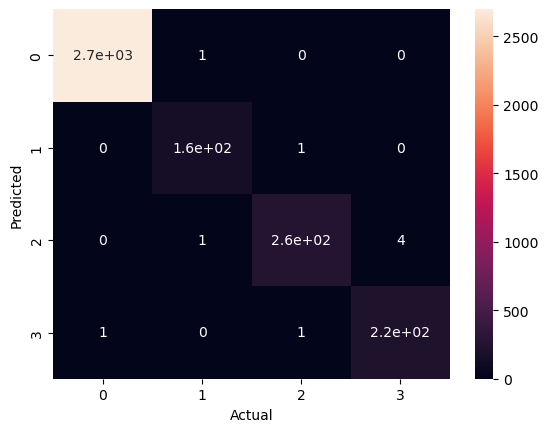

In [29]:
# Confusion matrix heatmap

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


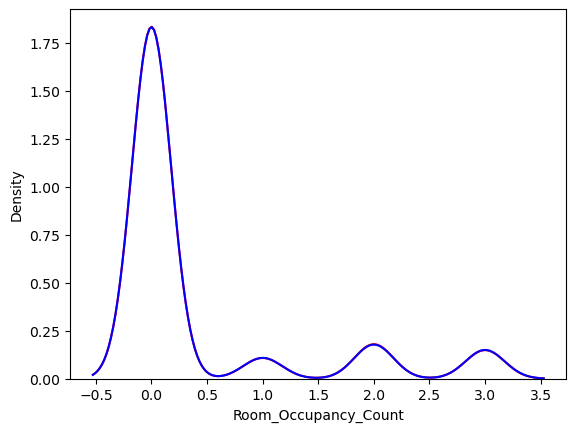

In [30]:
# Distribution plot for the predicted and actual values

ax = sns.distplot(y_test, hist=False, label='Actual', color='r')
sns.distplot(rfc_pred, hist=False, label='Predicted', color='b', ax=ax)
plt.show()

In [31]:
# Metrics

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2700
           1       0.99      0.99      0.99       159
           2       0.99      0.98      0.99       265
           3       0.98      0.99      0.99       219

    accuracy                           1.00      3343
   macro avg       0.99      0.99      0.99      3343
weighted avg       1.00      1.00      1.00      3343



In [32]:
print('Accuracy Score : ' + str(accuracy_score(y_test, rfc_pred)))
print('Precision Score : ' + str(precision_score(y_test, rfc_pred, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test, rfc_pred, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test, rfc_pred, average='weighted')))

Accuracy Score : 0.9973078073586599
Precision Score : 0.9973155244785115
Recall Score : 0.9973078073586599
F1 Score : 0.997307333071888


# Gaussian Naïve Bayes Classifier

In [33]:
# Importing the Gaussian Naïve Bayes classifier and mean_squared_error function from scikit-learn

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

# Training the Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(x_train, y_train)

GaussianNB()

In [34]:
# Making predictions
y_pred = gnb_classifier.predict(x_test)

In [35]:
# Metrics

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2700
           1       1.00      0.96      0.98       159
           2       0.81      0.94      0.87       265
           3       0.71      0.73      0.72       219

    accuracy                           0.96      3343
   macro avg       0.88      0.90      0.89      3343
weighted avg       0.96      0.96      0.96      3343



In [36]:
print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred)))
print('Precision Score : ' + str(precision_score(y_test, y_pred, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test, y_pred, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test, y_pred, average='weighted')))

Accuracy Score : 0.9605145079270117
Precision Score : 0.9631398366977787
Recall Score : 0.9605145079270117
F1 Score : 0.96140276158927
